# Case study 08 (Week 14)

## **Description**

***Case study on Unsupervised learning***

Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
#Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
# Importing seaborn as sns
import seaborn as sns
# Importing ScikitLearn
import sklearn

## Task 01

Read the dataset to the python environment.

In [2]:
# Reading wine dataset
wdata=pd.read_csv('Wine.csv')
wdata.sample(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840
51,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.600000,1.24,3.37,1265
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.600000,1.05,2.65,450
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.900000,0.75,2.81,562
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470


In [3]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
wdata.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
wdata.isna().sum().to_frame('Null value count')

,Null value count
Alcohol,0
Malic_Acid,0
Ash,0
Ash_Alcanity,0
Magnesium,0
Total_Phenols,0
Flavanoids,0
Nonflavanoid_Phenols,0
Proanthocyanins,0
Color_Intensity,0


### Early Insights :
* This Dataframe contains the details of chemical parameters (13 Category) of Wine.
* No null values.

## Task 02-03

* Try out different clustering models in the wine dataset.
* Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

### Preparing Standardized & Normalized

1. Standardized Dataset

In [9]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
wdata_sc = standard_scaler.fit_transform(wdata)

2. Normalized Dataset

In [10]:
from sklearn.preprocessing import Normalizer
normaizer = Normalizer()
wdata_n = normaizer.fit_transform(wdata)

### Fetching optimal WCSS for Standardised Data

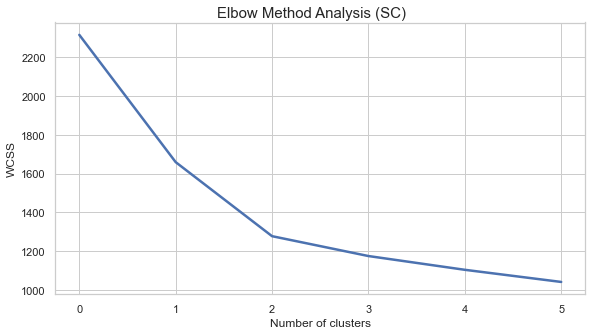

In [21]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
wcss_cs=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(wdata_sc)
  wcss_cs.append(kmeans.inertia_)
  
# plotting the result

fig, axes = plt.subplots(1, 1, figsize=(9.5, 5))
fig.suptitle('Elbow Method Analysis (SC)', fontsize=15, y=0.925)
sns.set_theme(style="whitegrid")
sns.lineplot(data=wcss_cs, palette="tab10", linewidth=2.5, ax=axes)
axes.set(xlabel='Number of clusters', ylabel='WCSS')
plt.show()

### Fetching optimal WCSS for Normalized Data

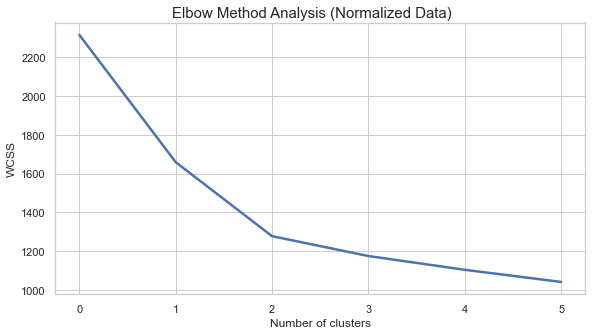

In [22]:
wcss_n=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(wdata_sc)
  wcss_n.append(kmeans.inertia_)
  
# plotting the result

fig, axes = plt.subplots(1, 1, figsize=(9.5, 5))
fig.suptitle('Elbow Method Analysis (Normalized Data)', fontsize=15, y=0.925)
sns.set_theme(style="whitegrid")
sns.lineplot(data=wcss_n, palette="tab10", linewidth=2.5, ax=axes)
axes.set(xlabel='Number of clusters', ylabel='WCSS')
plt.show()

### Note :
* Best suited count : 2

### Deeper analysis to fetch the suitable data

1. KMeans

In [33]:
df = [wdata_sc,wdata_n]
df_names = ['wdata_sc','wdata_n']
km_scores= []
km_silhouette = []
from sklearn.metrics import silhouette_score
for i,j in zip(df,df_names):
    km = KMeans(n_clusters=2, random_state=42).fit(i)
    preds = km.fit_predict(i)
    
    print("KMeans Score for the dataset {}: {}".format(j,km.score(i)))
    km_scores.append(-km.score(i))
    
    silhouette = silhouette_score(i,preds)
    km_silhouette.append(silhouette)
    print("KMeans Silhouette score for the Dataset {}: {}".format(j,silhouette))

KMeans Score for the dataset wdata_sc: -1659.0079672511504
KMeans Silhouette score for the Dataset wdata_sc: 0.26831340971052126
KMeans Score for the dataset wdata_n: -0.2109756129665462
KMeans Silhouette score for the Dataset wdata_n: 0.5381503708882504


2. Agglomerative HC

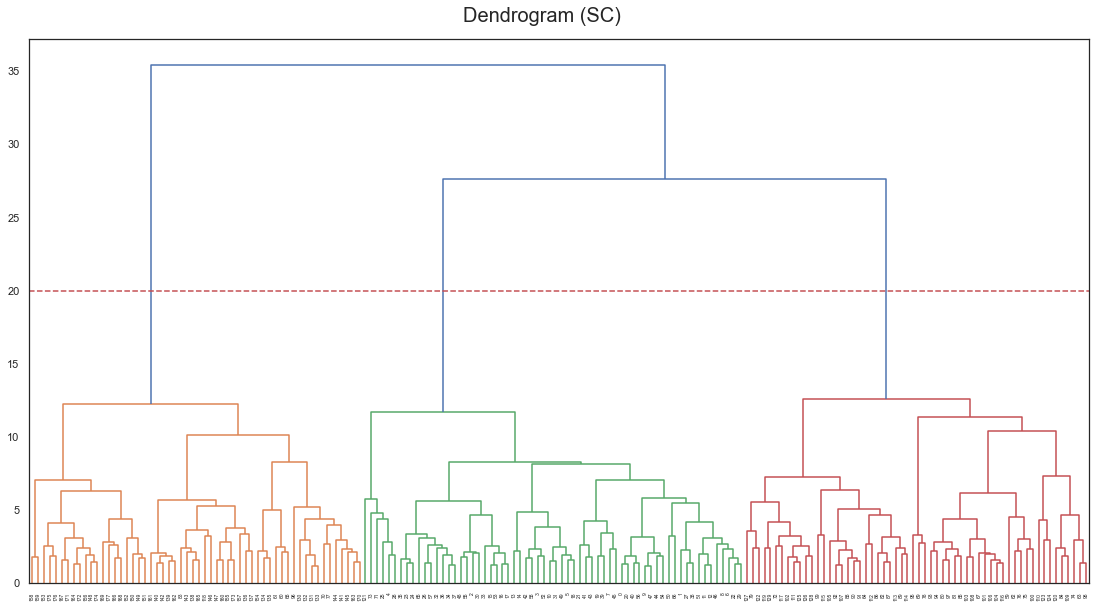

In [44]:
import scipy.cluster.hierarchy as ch
plt.figure(figsize=(19,10))
sns.set_theme(style="white")
plt.suptitle('Dendrogram (SC)', fontsize=20, y=0.925)
dendrogram=ch.dendrogram(ch.linkage(wdata_sc,method='ward'))
plt.hlines(20,0,2000, colors="r", linestyles="dashed")
plt.show()

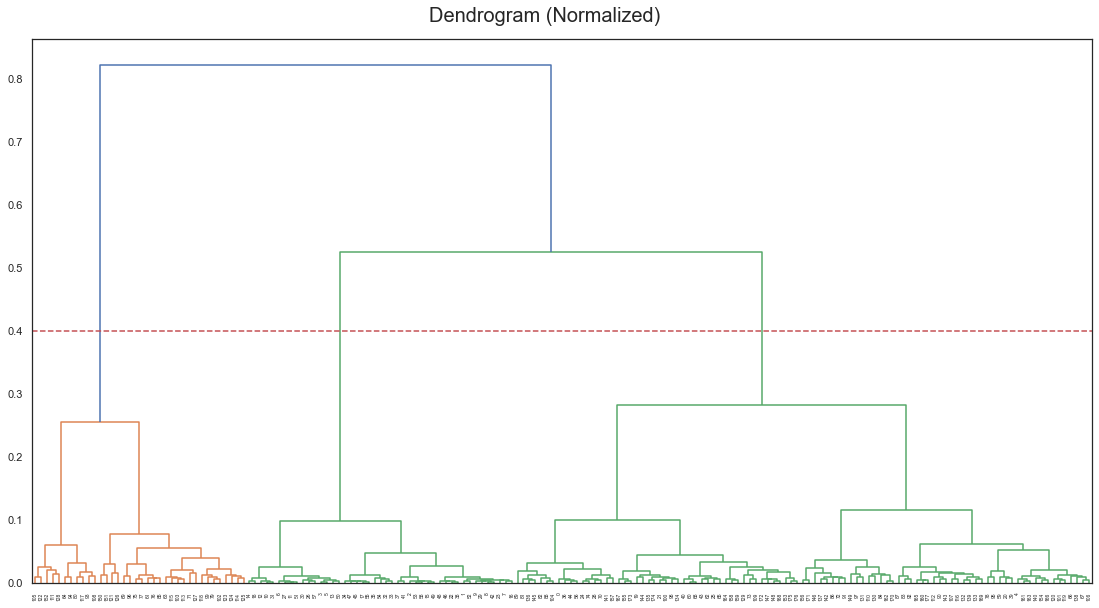

In [45]:
plt.figure(figsize=(19,10))
sns.set_theme(style="white")
plt.suptitle('Dendrogram (Normalized)', fontsize=20, y=0.925)
dendrogram=ch.dendrogram(ch.linkage(wdata_n,method='ward'))
plt.hlines(0.4,0,2000, colors="r", linestyles="dashed")
plt.show()

In [36]:
hc_silhouette = []
from sklearn.cluster import AgglomerativeClustering
for i,j in zip(df,df_names):
    hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(i)
    preds_1 = hc.fit_predict(i)
    
    silhouette = silhouette_score(i,preds_1)
    hc_silhouette.append(silhouette)
    print("HC Silhouette score for the Dataset {}: {}".format(j,silhouette))

HC Silhouette score for the Dataset wdata_sc: 0.225836659334758
HC Silhouette score for the Dataset wdata_n: 0.4685531994893181


### Notes :
* Selecting Normalised dataset for PCA
* Found optimal cluster number for HC as 3 for both Datasets

### Preparing PCA Dataset

In [37]:
from sklearn.decomposition import PCA
pca =PCA(n_components = 0.97)
pca.fit(wdata_n)
wdata_pca = pca.transform(wdata_n)

## K-Means (PCA)

### Fetching optimal WCSS for PCA Dataset

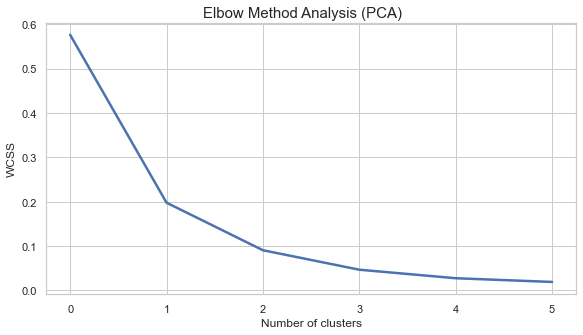

In [40]:
wcss_pca=[]
for i in range(1,7):
  kmeans=KMeans(n_clusters=i, init='k-means++',  random_state=42)
  kmeans.fit(wdata_pca)
  wcss_pca.append(kmeans.inertia_)
  
# plotting the result

fig, axes = plt.subplots(1, 1, figsize=(9.5, 5))
fig.suptitle('Elbow Method Analysis (PCA)', fontsize=15, y=0.925)
sns.set_theme(style="whitegrid")
sns.lineplot(data=wcss_pca, palette="tab10", linewidth=2.5, ax=axes)
axes.set(xlabel='Number of clusters', ylabel='WCSS')
plt.show()

### Note :
* Cluster count remains unchanged

In [41]:
km = KMeans(n_clusters=2, random_state=42).fit(wdata_pca)
preds = km.fit_predict(wdata_pca)
    
print("KMeans Score for the dataset {}: {}".format('wdata_pca',km.score(wdata_pca)))
    
silhouette = silhouette_score(wdata_pca,preds)
print("KMeans Silhouette score for the Dataset {}: {}".format('wdata_pca',silhouette))

KMeans Score for the dataset wdata_pca: -0.19760090717510137
KMeans Silhouette score for the Dataset wdata_pca: 0.5657149942211519


### Insight :
* PCA Improved the efficiency of the Model

## Agglomerative HC (PCA)

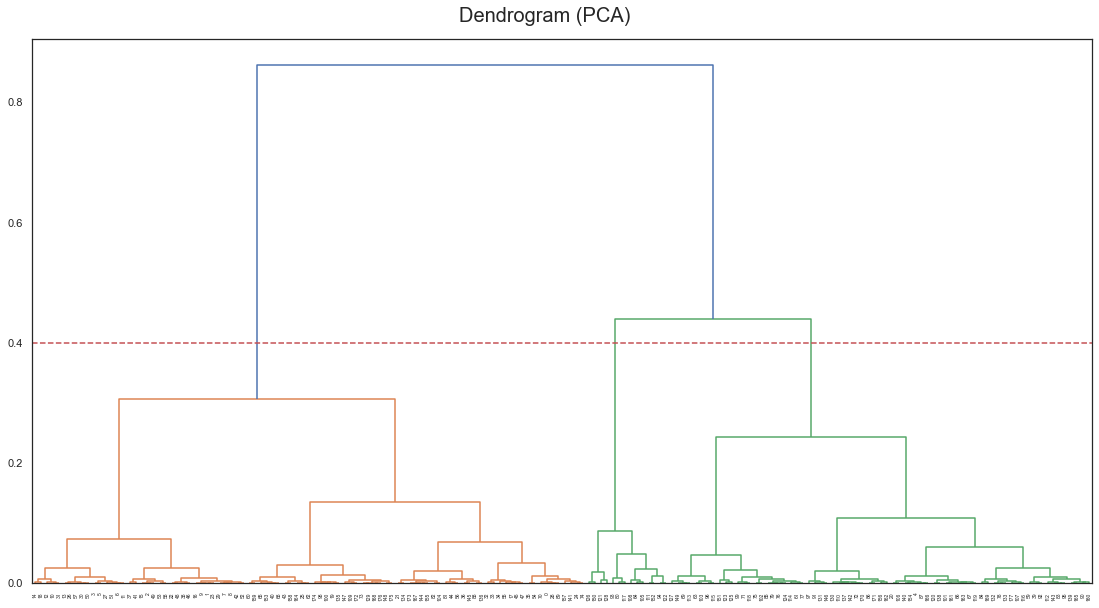

In [46]:
plt.figure(figsize=(19,10))
sns.set_theme(style="white")
plt.suptitle('Dendrogram (PCA)', fontsize=20, y=0.925)
dendrogram=ch.dendrogram(ch.linkage(wdata_pca,method='ward'))
plt.hlines(0.4,0,2000, colors="r", linestyles="dashed")
plt.show()

In [47]:
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit(wdata_pca)
preds_1 = hc.fit_predict(wdata_pca)  
silhouette = silhouette_score(wdata_pca,preds_1)
hc_silhouette.append(silhouette)
print("HC Silhouette score for the Dataset {}: {}".format('wdata_pca',silhouette))

HC Silhouette score for the Dataset wdata_pca: 0.5161409368731543


## Summary :

After a series of analysis applied on KMeans & Agglomerative HC, I found KMeans (with some fine tuning) as the most fit Unsuperwised ML Algorithm for Wine Dataset. I used PCA on Normalised form of the Data with 2 number of clusters. Final KMeans Silhouette score for our project is "0.56571".

**End of the File reached**